[3. 0. 0. 0. 3. 3. 0. 3. 0. 0. 3. 3. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 0. 3. 3. 3. 0. 0. 3. 3. 3. 0. 0. 3. 3. 0. 3. 3. 0. 0. 3. 3. 0. 3. 0.
 3. 3. 1. 1. 1. 2. 1. 2. 1. 0. 1. 0. 0. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 0. 2. 1. 2. 1. 2. 1. 1. 0. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2.
 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 2. 1. 2. 2.]


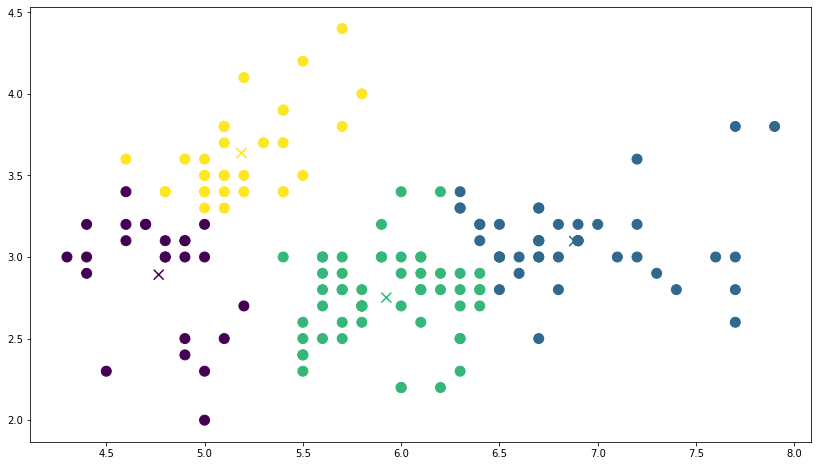

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline


#计算欧式距离
def distEuclid(vecA, vecB):  
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))


#随机选择k个中心点
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros([k, n]))  #创建 k 行 n列的全为0 的矩阵
    for j in range(n):
        minj = np.min(dataSet[:,j]) #获得第j 列的最小值
        rangej = float(np.max(dataSet[:,j]) - minj)     #得到最大值与最小值之间的范围
        #获得输出为 K 行 1 列的数据，并且使其在数据集范围内
        centroids[:,j] = np.array(minj + rangej * np.random.rand(k, 1))
    return centroids.A


class kmeans(object):
    def __init__(self, k = 1):
        assert k > 0
        self.k = k
        self.labels = []
    
    
    def fit(self,dataSet):    
        row = np.shape(dataSet)[0]    #得到行数，即为样本数
        clusterAssement = np.zeros([row,2])   #创建 row 行 2 列的矩阵
        centroids = randCent(dataSet, self.k)      #初始化 k 个中心点
        clusterChanged = True
        
        
        while clusterChanged:
            clusterChanged = False
            for i in range(row):
                minDist = np.inf   #初始设置值为无穷大
                minIndex = -1
                for j in range(self.k):
                    #  j循环，先计算 k个中心点到1 个样本的距离，在进行i循环，计算得到k个中心点到全部样本点的距离
                    distJ = distEuclid(centroids[j,:], dataSet[i,:])
                    if distJ <  minDist:
                        minDist = distJ #更新最小的距离
                        minIndex = j 
                if clusterAssement[i,0] != minIndex:    #如果中心点不变化的时候，则终止循环
                    clusterChanged = True 
                clusterAssement[i,:] = minIndex, minDist**2 #将 index，k值中心点 和  最小距离存入到数组中
            
            #更换中心点的位置
            for cent in range(self.k):
                ptsInClust = dataSet[np.nonzero(clusterAssement[:,0] == cent)[0]] #分别找到属于k类的数据
                if len(ptsInClust) != 0:
                    centroids[cent, :] = np.mean(ptsInClust,axis = 0) #得到更新后的中心点
                    
        self.labels=clusterAssement[:,0]
        self.center=centroids

                    
if __name__ == '__main__':
    iris = datasets.load_iris()
    dataset = iris.data[:,0:2]
    k=4
    
    my=kmeans(k)
    my.fit(dataset)
    
    #绘图
    plt.figure(figsize=(14, 8))
    print(my.labels)
    plt.scatter(dataset[:,0],dataset[:,1],marker='o',c=my.labels,s=100)
    plt.scatter(my.center[:,0],my.center[:,1],marker='x',s=100,c=[i for i in range (k)])
    plt.show()    